# 1교시

In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv")
df 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


## 1. 실린더의 값(중복 없이)

In [8]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [11]:
### 1-1. 실린더 값 변경하기

In [12]:
number = {8:"eight", 4:"four", 6:"six", 3:"three", 5:"five"} 

In [13]:
df['cylinders'].replace(number)

0      eight
1      eight
2      eight
3      eight
4      eight
       ...  
393     four
394     four
395     four
396     four
397     four
Name: cylinders, Length: 398, dtype: object

In [15]:
df['cylinders'].map(number)

0      eight
1      eight
2      eight
3      eight
4      eight
       ...  
393     four
394     four
395     four
396     four
397     four
Name: cylinders, Length: 398, dtype: object

## 2. 희소행렬이란?

#### sparse matrix

## 2-1. one-hot encoding

### ex) 000100000 , 000001000

## 2-2. 원핫인코딩 해주는 함수는? pd.get_dummies()

In [21]:
pd.get_dummies(df.cylinders)

,3,4,5,6,8
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
393,0,1,0,0,0
394,0,1,0,0,0
395,0,1,0,0,0
396,0,1,0,0,0


## 3. df['animal'] 열 만들기

In [23]:
data = pd.DataFrame({'food':['bacon','pulled pork','bacon',
                      'pastrami', 'corned beef', 'bacon',
                      'pastrami', 'honey ham', 'nova lox'],
                      'ounces':[4,3,12,6,7.5,8,3,5,6]})
meat_to_animal = {
    'bacon':'pig',
    'pulled pork':'pig',
    'pastrami':'cow',
    'corned beef':'cow',
    'honey ham':'pig',
    'nova lox':'salmon'} 

In [24]:
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [26]:
data['animal'] = data['food'].map(meat_to_animal)

In [27]:
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


### 3-1. ounces 열에 3을 7로 바꾸기

In [29]:
data['ounces'] = data['ounces'].replace(3.0,7)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,7.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,7.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


## 4. pydataset 패키지 인스톨하기

In [30]:
pip install pydataset

     --------------------------------------- 15.9/15.9 MB 25.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939425 sha256=a4c15fac204c109c86ee60414dbcdf0e541735d89183ed5b6b82f20c1fc0e579
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\af\26\f6\2b0f6bbcccc53e742b778415e25002df5cabf05f4537d80dad
Successfully built pydataset
Note: you may need to restart the kernel to use updated packages.


In [31]:
from pydataset import data

initiated datasets repo at: C:\Users\user\.pydataset/


In [32]:
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


### 4-1. 열의 이름을 모두 소문자로 바꾸세요

In [33]:
data("USArrests")

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [37]:
df = data("USArrests")
# df

In [42]:
df.columns = df.columns.map(str.lower)
# df.columns.str.lower()

### 4-2. murder 의 값이 높은 순서대로 순위를 부여하세요.(컬럼이름: murder_ranking, 내림차순 정렬)

In [52]:
df['murder_ranking'] = df['murder'].rank(method='first',ascending=False)

In [53]:
df

,murder,assault,urbanpop,rape,murder_ranking
Alabama,13.2,236,58,21.2,6.0
Alaska,10.0,263,48,44.5,16.0
Arizona,8.1,294,80,31.0,22.0
Arkansas,8.8,190,50,19.5,20.0
California,9.0,276,91,40.6,18.0
Colorado,7.9,204,78,38.7,23.0
Connecticut,3.3,110,77,11.1,41.0
Delaware,5.9,238,72,15.8,32.0
Florida,15.4,335,80,31.9,3.0
Georgia,17.4,211,60,25.8,1.0


### 4-3. 랭킹순서대로 정렬

In [54]:
df.sort_values('murder_ranking')

,murder,assault,urbanpop,rape,murder_ranking
Georgia,17.4,211,60,25.8,1.0
Mississippi,16.1,259,44,17.1,2.0
Florida,15.4,335,80,31.9,3.0
Louisiana,15.4,249,66,22.2,4.0
South Carolina,14.4,279,48,22.5,5.0
Alabama,13.2,236,58,21.2,6.0
Tennessee,13.2,188,59,26.9,7.0
North Carolina,13.0,337,45,16.1,8.0
Texas,12.7,201,80,25.5,9.0
Nevada,12.2,252,81,46.0,10.0


### 4-4. pd.cut을 사용하여, 기준을 만들어 'safe_degree' 칼럼으로 만들어서 저장하세요

In [55]:
group_names=['super_danger','danger','normal','safe','super_safe'] 

In [58]:
bins=[0,10,20,30,40,50]
df['safe_degree'] = pd.cut(df['murder_ranking'],bins,labels=group_names)

In [59]:
df

,murder,assault,urbanpop,rape,murder_ranking,safe_degree
Alabama,13.2,236,58,21.2,6.0,super_danger
Alaska,10.0,263,48,44.5,16.0,danger
Arizona,8.1,294,80,31.0,22.0,normal
Arkansas,8.8,190,50,19.5,20.0,danger
California,9.0,276,91,40.6,18.0,danger
Colorado,7.9,204,78,38.7,23.0,normal
Connecticut,3.3,110,77,11.1,41.0,super_safe
Delaware,5.9,238,72,15.8,32.0,safe
Florida,15.4,335,80,31.9,3.0,super_danger
Georgia,17.4,211,60,25.8,1.0,super_danger


## 5. 표준정규분포에 따른 랜덤한 수를 50 * 5 배열로 만들고 데이터프레임으로 저장ㅋ

In [62]:
df = pd.DataFrame(np.random.randn(50,5))

In [63]:
df

,0,1,2,3,4
0,0.680809,-1.194687,-0.143640,-2.612143,0.033272
1,1.774002,-0.239529,-0.228513,-1.091908,-2.297128
2,1.149245,1.294347,0.221233,-0.821470,-0.642099
3,-0.014660,0.984152,1.559891,0.589795,1.577185
4,-0.766292,0.169345,-0.861298,0.262398,1.731055
5,-1.139805,-0.806050,0.788572,-0.724147,-1.505097
6,-0.681278,1.229424,1.990856,-0.136009,-2.316812
7,0.787754,-0.810652,0.119830,-0.567330,0.212838
8,-0.019830,0.097496,-0.398595,-0.371664,1.087945
9,-0.534409,-1.205376,0.958250,-2.100711,-1.182107


### 5-1. df에서 랜덤하게 20개를 추출하세요

In [64]:
df.sample(n=20)

,0,1,2,3,4
48,0.859608,1.572224,-0.212531,0.648319,-0.351601
31,-0.034956,-0.756218,-0.802305,-0.497533,0.364892
43,0.174647,0.271871,-1.327781,1.116487,0.989629
12,0.878450,0.485921,0.877310,-1.315933,0.690241
29,-0.294047,-1.232173,-0.925146,0.477140,-0.481247
9,-0.534409,-1.205376,0.958250,-2.100711,-1.182107
17,0.984590,0.401773,-0.144278,-1.146557,-1.424353
3,-0.014660,0.984152,1.559891,0.589795,1.577185
44,-0.663715,-0.094427,1.161898,1.608036,-0.543113
39,-0.626259,-0.160773,2.664181,0.330487,0.443213


### 5-2. 임의로 10%를 추출

In [65]:
df.sample(frac=0.1)

,0,1,2,3,4
6,-0.681278,1.229424,1.990856,-0.136009,-2.316812
21,0.071433,0.950367,-1.400501,-0.759205,0.760054
42,0.748292,-1.201298,0.851961,0.560540,-0.501354
38,0.845149,0.347007,2.281695,0.285750,1.318177
15,0.370112,1.692591,1.645844,1.902052,0.802980


## 6. 1~101 100개의 자연수 (10,10) 데이터 프레임 만들기

In [66]:
np.random.seed(12345)

In [67]:
df = pd.DataFrame(np.random.randint(1,101,(10,10)))

In [68]:
df

,0,1,2,3,4,5,6,7,8,9
0,99,30,2,37,42,35,30,2,60,15
1,92,81,74,12,78,11,82,83,39,8
2,44,24,30,57,56,32,62,98,92,88
3,37,65,4,6,16,76,15,82,6,35
4,54,73,6,99,6,60,84,13,15,81
5,28,39,89,97,6,75,77,23,13,63
6,42,19,51,83,58,47,59,24,22,8
7,82,64,1,91,45,58,15,27,44,31
8,100,33,4,65,7,67,50,38,73,44
9,63,87,22,66,97,6,63,85,72,70


### 6-1. 임의로 5개 추출

In [88]:
df = df.sample(n=5)

In [89]:
df

,0,1,2,3,4,5,6,7,8,9
7,82,64,1,91,45,58,15,27,44,31
4,54,73,6,99,6,60,84,13,15,81
5,28,39,89,97,6,75,77,23,13,63
0,99,30,2,37,42,35,30,2,60,15
2,44,24,30,57,56,32,62,98,92,88


### 6-2. 95보다 큰 수가 하나라도 있는 행을 추출하세요

In [90]:
df[(df>95).any(axis=1)]

,0,1,2,3,4,5,6,7,8,9
4,54,73,6,99,6,60,84,13,15,81
5,28,39,89,97,6,75,77,23,13,63
0,99,30,2,37,42,35,30,2,60,15
2,44,24,30,57,56,32,62,98,92,88


## 7. NaN 값을 미응시, 시험취소로 바꾸세요

In [91]:
from numpy import nan as NA
exam = pd.DataFrame([[60,95,60], [95,75,NA], [NA,85,90], [70,70,NA]],
                    index = ['가영','나영','다영','아영'],
                    columns = ['필기1', '필기2', '실기'])
exam 

,필기1,필기2,실기
가영,60.0,95,60.0
나영,95.0,75,NaN
다영,NaN,85,90.0
아영,70.0,70,NaN


In [92]:
exam.fillna({'필기1':"미응시","실기":"시험취소"})

,필기1,필기2,실기
가영,60.0,95,60.0
나영,95.0,75,시험취소
다영,미응시,85,90.0
아영,70.0,70,시험취소


In [93]:
### 7-1. 필기2점수를 F,C,B,A 그룹으로 나누세요

In [ ]:
exam['등급'] = pd.cut(exam['필기'],bins,labels=)

In [94]:
bins=[60,70,80,90,100]

In [ ]:
grade=["F]

In [95]:
bins = [60, 70, 80, 90, 100]
groups = ['F', 'C', 'B', 'A']
exam['등급'] = pd.cut(exam['필기2'], bins, labels = groups) 

In [96]:
exam

,필기1,필기2,실기,등급
가영,60.0,95,60.0,A
나영,95.0,75,NaN,C
다영,NaN,85,90.0,B
아영,70.0,70,NaN,F


# 2교시

In [127]:
import re
text = 'foo bar\t baz \tqux'

In [117]:
text = text.split('\t')

In [119]:
text

['foo bar', ' baz ', 'qux']

In [128]:
p = re.compile("\s+")

In [129]:
p.split(text)

['foo', 'bar', 'baz', 'qux']

In [131]:
p.findall(text)

[' ', '\t ', ' \t']

In [123]:
sentence = []
for i in text:
      sentence.append(i.split(" "))
sentence

[['foo', 'bar'], ['', 'baz', ''], ['qux']]

In [124]:
sentence[0] + sentence[1] + sentence[2]

['foo', 'bar', '', 'baz', '', 'qux']

In [125]:
[j.strip() for i in text for j in i.split()] 

['foo', 'bar', 'baz', 'qux']

## 정규표현식

In [144]:
text = """Dave 
dave@google.com

Steve 
steve@gmail.com

Rob 
rob@gmail.com

Ryan
""" 

In [145]:
p = re.compile("[a-zA-Z0-9._%+-]+@\w+[.][a-zA-Z]{2,4}",re.I)

In [146]:
# p = re.compile("\w")


In [147]:
p.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com']

In [148]:
p.search(text).group() # 처음부터 안나와도 됨
p.match(text) # 무조건 맨 처음부터 나와야 나옴
p.findall(text)
p.finditer(text)

In [149]:
[i.group() for i in p.finditer(text)]

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com']

In [150]:
p.sub("",text)

'Dave \n\n\nSteve \n\n\nRob \n\n\nRyan\n'

# 3교시 : 307p

## 다중인덱스

In [155]:
data = pd.Series(np.random.randn(9), index = [['a','a','a','b','b','c','c','d','d'],[1,2,3,1,3,1,2,2,3]])

data

a  1   -0.929006
   2   -0.482573
   3   -0.036264
b  1    1.095390
   3    0.980928
c  1   -0.589488
   2    1.581700
d  2   -0.528735
   3    0.457002
dtype: float64

In [156]:
data.index[0]

('a', 1)

In [157]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [158]:
data['a']

1   -0.929006
2   -0.482573
3   -0.036264
dtype: float64

In [160]:
data['b']

1    1.095390
3    0.980928
dtype: float64

In [163]:
data['a':'c'] # 시리즈에서 슬라이싱은 특이하다. 끝범위 포함됨

a  1   -0.929006
   2   -0.482573
   3   -0.036264
b  1    1.095390
   3    0.980928
c  1   -0.589488
   2    1.581700
dtype: float64

In [164]:
data.loc[:,2]

a   -0.482573
c    1.581700
d   -0.528735
dtype: float64

In [166]:
df = data.unstack()
df

,1,2,3
a,-0.929006,-0.482573,-0.036264
b,1.095390,NaN,0.980928
c,-0.589488,1.581700,NaN
d,NaN,-0.528735,0.457002


In [167]:
df.stack()

a  1   -0.929006
   2   -0.482573
   3   -0.036264
b  1    1.095390
   3    0.980928
c  1   -0.589488
   2    1.581700
d  2   -0.528735
   3    0.457002
dtype: float64

In [168]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])
frame 

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [169]:
frame.index

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [170]:
frame.columns

MultiIndex([(    'Ohio', 'Green'),
            (    'Ohio',   'Red'),
            ('Colorado', 'Green')],
           )

In [171]:
frame.index.names = ['key1','key2']
frame

Ohio     Colorado
          Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [172]:
frame.columns.names = ['state','color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [173]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [174]:
frame['Colorado']

color      Green
key1 key2       
a    1         2
     2         5
b    1         8
     2        11

In [175]:
frame.loc['a', ]

state  Ohio     Colorado
color Green Red    Green
key2                    
1         0   1        2
2         3   4        5

In [176]:
frame.swaplevel('key1','key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [179]:
frame.sort_index(1) # (level=1) 로 써줘야 워닝메세지가 안뜸

C:\Users\user\AppData\Local\Temp\ipykernel_4048\447091528.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  frame.sort_index(1) # (level=1) 로 써줘야 워닝메세지가 안뜸


state     Colorado  Ohio    
color        Green Green Red
key1 key2                   
a    1           2     0   1
     2           5     3   4
b    1           8     6   7
     2          11     9  10

In [180]:
frame.sum()

state     color
Ohio      Green    18
          Red      22
Colorado  Green    26
dtype: int64

In [181]:
frame.sum(level="color",axis = 1)

C:\Users\user\AppData\Local\Temp\ipykernel_4048\3220231265.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  frame.sum(level="color",axis = 1)


color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

In [190]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                        'c': ['one', 'one', 'one', 'two', 'two',
                             'two', 'two'],
                        'd': [0, 1, 2, 0, 1, 2, 3]})
frame 

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [186]:
df = frame.set_index('c')
df.loc['one']

,a,b,d
c,,,
one,0,7,0
one,1,6,1
one,2,5,2


In [192]:
frame.set_index(['a','b'])

,,c,d
a,b,,
0,7,one,0
1,6,one,1
2,5,one,2
3,4,two,0
4,3,two,1
5,2,two,2
6,1,two,3


In [193]:
df

,a,b,d
c,,,
one,0,7,0
one,1,6,1
one,2,5,2
two,3,4,0
two,4,3,1
two,5,2,2
two,6,1,3


In [194]:
df.reset_index()

,c,a,b,d
0,one,0,7,0
1,one,1,6,1
2,one,2,5,2
3,two,3,4,0
4,two,4,3,1
5,two,5,2,2
6,two,6,1,3


In [195]:
frame.set_index(['a','b'],drop=False)

,,a,b,c,d
a,b,,,,
0,7,0,7,one,0
1,6,1,6,one,1
2,5,2,5,one,2
3,4,3,4,two,0
4,3,4,3,two,1
5,2,5,2,two,2
6,1,6,1,two,3


# 5교시 : 315p ~ 

In [228]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [208]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [209]:
pd.merge(df1,df2,on='key') # 이름이 같은 컬럼 : key

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [210]:
df2.loc[3] = ['a',1]
df2

,key,data2
0,a,0
1,b,1
2,d,2
3,a,1


In [211]:
pd.merge(df1,df2,on='key') # 이름이 같은 컬럼 : key

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,2,1
5,a,4,0
6,a,4,1
7,a,5,0
8,a,5,1


In [212]:
pd.merge(df1,df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,2,1
5,a,4,0
6,a,4,1
7,a,5,0
8,a,5,1


In [215]:
df1 = df1[:3]

In [216]:
pd.merge(df1,df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,a,2,1


In [217]:
pd.merge(df1,df2,on='key',how='inner')

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,a,2,1


In [218]:
pd.merge(df1,df2,on='key',how='inner')
pd.merge(df1,df2,on='key',how='outer')
pd.merge(df1,df2,on='key',how='left')

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,a,2,1


In [220]:
df1.rename({'key':"1key"},axis=1,inplace=True)
df1

C:\Users\user\AppData\Local\Temp\ipykernel_4048\2220569391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename({'key':"1key"},axis=1,inplace=True)


,1key,data1
0,b,0
1,b,1
2,a,2


In [221]:

df2

,key,data2
0,a,0
1,b,1
2,d,2
3,a,1


In [226]:
pd.merge(df1,df2,left_on='1key',right_on='rkey')

KeyError: 'rkey'

In [229]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [230]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                      'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
            'data2': range(5)}) 

In [231]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [232]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [233]:
pd.merge(df1,df2)

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [234]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                        'key2': ['one', 'two', 'one'],
                        'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                        'key2': ['one', 'one', 'one', 'two'],
                         'rval': [4, 5, 6, 7]}) 

In [235]:
left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [236]:
right

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [237]:
pd.merge(left,right)

,key1,key2,lval,rval
0,foo,one,1,4
1,foo,one,1,5
2,bar,one,3,6


In [239]:
pd.merge(left,right, on=['key1','key2'],how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [240]:
pd.merge(left,right,how='inner')

,key1,key2,lval,rval
0,foo,one,1,4
1,foo,one,1,5
2,bar,one,3,6


In [241]:
pd.merge(left,right, on = 'key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [242]:
pd.merge(left,right,on = 'key1',suffixes=('_left','_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [243]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [244]:
df1.T

,0,1,2,3,4,5
key,b,b,a,c,a,b
data1,0,1,2,3,4,5


In [245]:
df1.set_index('key')

,data1
key,
b,0
b,1
a,2
c,3
a,4
b,5


In [247]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
   
                       'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b']) 

In [248]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [249]:
right1

,group_val
a,3.5
b,7.0


In [250]:
right.reset_index()

,index,key1,key2,rval
0,0,foo,one,4
1,1,foo,one,5
2,2,bar,one,6
3,3,bar,two,7


In [252]:
pd.merge(left1,right1,left_on='key',right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


# 6교시

In [254]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                                   'Nevada', 'Nevada'],
                          'key2': [2000, 2001, 2002, 2001, 2002],
                          'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                        index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
                                  'Ohio', 'Ohio'],
                                [2001, 2000, 2000, 2000, 2001, 2002]],
                       columns=['event1', 'event2']) 

In [255]:
lefth

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [256]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [257]:
pd.merge(lefth, righth,left_on =['key1','key2'] , right_index = True)

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [258]:
pd.merge(lefth, righth,left_on =['key1','key2'] , right_index = True,how='outer')

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


In [259]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                         index=['a', 'c', 'e'],
                        columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                          index=['b', 'c', 'd', 'e'],
                          columns=['Missouri', 'Alabama']) 

In [260]:
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [261]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [262]:
pd.merge(left2,right2,left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
c,3.0,4.0,9.0,10.0
e,5.0,6.0,13.0,14.0


In [263]:
pd.merge(left2,right2,left_index=True, right_index=True,how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


## 347p ~

### matplotlib

In [265]:
import matplotlib.pyplot as plt

In [266]:
data = np.random.randint(1,11,size=10)
data

array([ 3,  9,  1,  7, 10,  1,  1,  9,  4,  8])

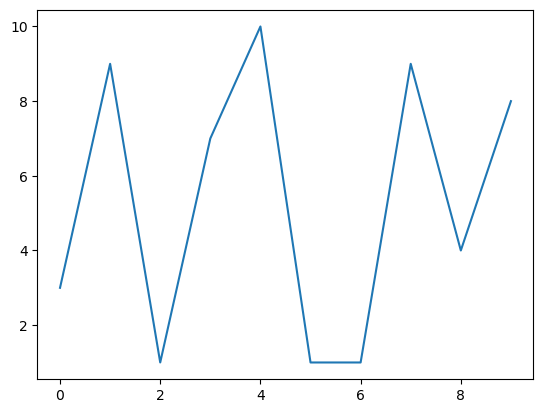

In [267]:
plt.plot(data)

In [268]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

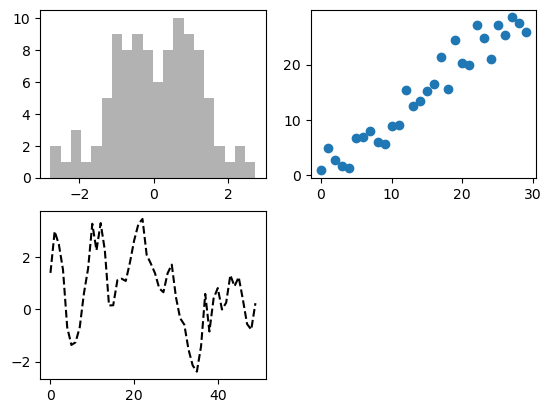

In [276]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))
ax3.plot(np.random.randn(50).cumsum(),'k--')

<Axes: >

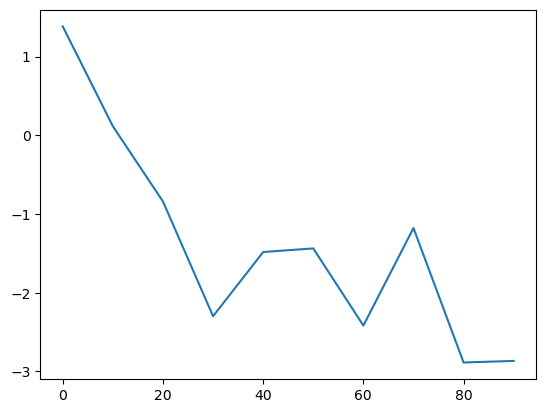

In [279]:
s = pd.Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
s.plot()

In [281]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),columns=['A','B',"C",'D'],index=np.arange(0,100,10))

In [282]:
df

,A,B,C,D
0,-2.137345,-0.394964,0.864876,0.320682
10,-3.455165,0.319033,0.125894,-0.893244
20,-3.669879,0.666754,-0.034192,-0.673508
30,-5.216486,2.799812,-0.714676,-0.558877
40,-4.690605,4.783116,-1.192504,0.465788
50,-4.769979,6.003054,-1.670775,1.284526
60,-6.484197,6.590606,-1.238303,0.735424
70,-6.443137,6.011510,0.700458,0.391418
80,-5.689229,6.277760,0.495941,1.297880
90,-6.005555,5.600534,0.125549,1.843890


<Axes: >

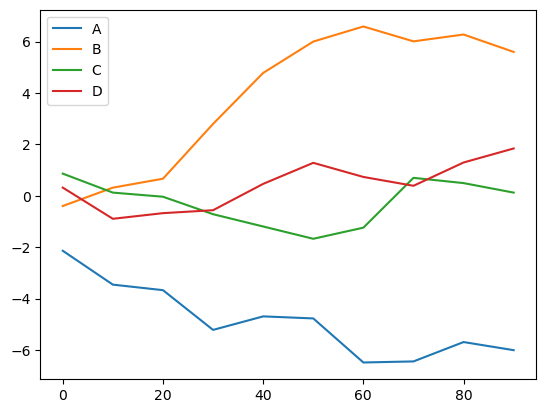

In [286]:
df.plot()
# plt.plot(df)

In [287]:
# df.plot() == df.plot.line() == df.plot(kind='line') # 같은 표현

<Axes: >

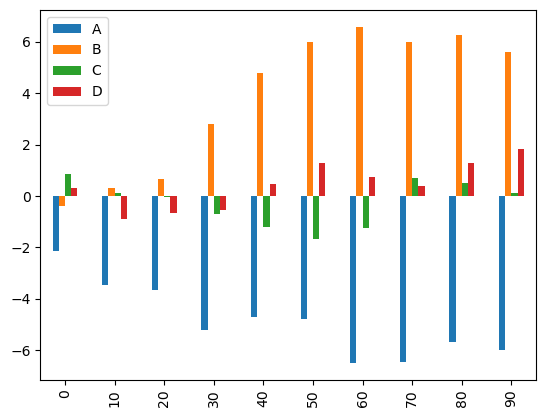

In [288]:
df.plot(kind='bar')